# Rows Selections
This notebook is for data exploration for each columns
and filter rows


In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#read data, specify index so it's easier to join and search using loc
path = '../../../data/new-york-city-airbnb-open-data/'
listings_csv = os.path.join(path,'selected_columns_listings.csv')
listings = pd.read_csv(listings_csv, index_col = 'id')

In [3]:
#to get all columns, set option
pd.set_option('display.max_columns', 107)
#to get text with no truncation
pd.set_option('display.max_colwidth', -1)

In [4]:
#shape
listings.shape

(50796, 39)

In [5]:
listings.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')

In [6]:
#head
listings.head(1).T

id,2060
host_since,2008-08-18
host_response_time,a few days or more
host_response_rate,22%
host_acceptance_rate,50%
host_is_superhost,f
host_listings_count,0
host_verifications,['reviews']
host_identity_verified,f
neighbourhood_group_cleansed,Manhattan
latitude,40.8572


host_response_time
a few days or more    1118 
within a day          4218 
within a few hours    6009 
within an hour        20445
Name: host_response_time, dtype: int64


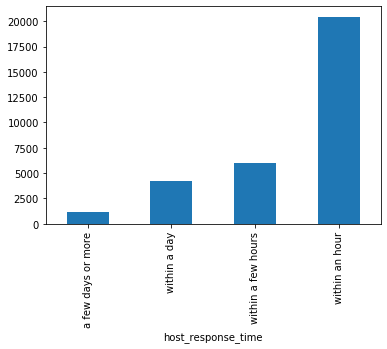

In [7]:
#host_response_time
df = listings.groupby('host_response_time')['host_response_time'].size()
print(df)
df.plot(kind='bar')

#from the data: make two classes, within an hour or more than an hour


host_response_rate
100%    22483
90%     1293 
80%     669  
97%     611  
0%      581  
Name: host_response_rate, dtype: int64


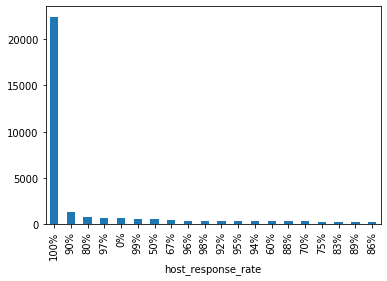

In [8]:
#host_response_rate

df = listings.groupby('host_response_rate')['host_response_rate'].size().sort_values(ascending=False).head(20)
print(df.sort_values(ascending=False).head())
df.plot(kind='bar')

#from the data: looks like majority is 100%, maybe split to 2 classes (100% vs no 100%)

host_acceptance_rate
100%    11510
99%     2130 
98%     1944 
97%     1296 
0%      1207 
Name: host_acceptance_rate, dtype: int64


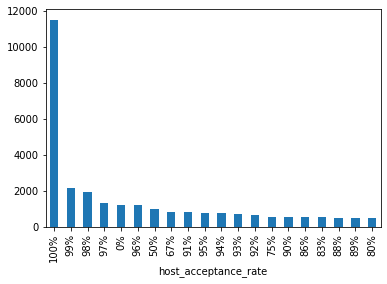

In [9]:
#host_acceptance_rate, top 20

df = listings.groupby('host_acceptance_rate')['host_acceptance_rate'].size().sort_values(ascending=False).head(20)
print(df.head())
df.plot(kind='bar')

#from the data: looks like majority is 100%, maybe split to 2 classes (100% vs no 100%)

host_is_superhost
f    40852
t    9939 
Name: host_is_superhost, dtype: int64


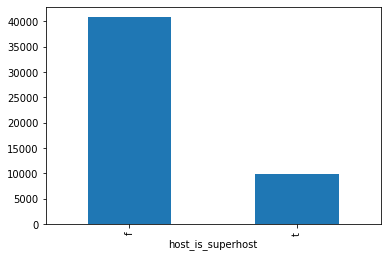

In [10]:
#host_is_superhost

df = listings.groupby('host_is_superhost')['host_is_superhost'].size()
print(df.head())
df.plot(kind='bar')


host_listings_count
1.0    27105
2.0    7258 
0.0    4706 
3.0    3237 
4.0    1691 
Name: host_listings_count, dtype: int64


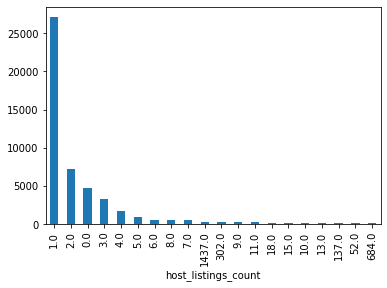

In [11]:
#host_listings_count

df = listings.groupby('host_listings_count')['host_listings_count'].size().sort_values(ascending=False).head(20)
print(df.head())
df.plot(kind='bar')

#mostly one, may create couple classes, 1 and more than 1

host_verifications
['email', 'phone', 'reviews', 'kba']                                                         4398
['email', 'phone', 'reviews', 'jumio', 'government_id']                                      4167
['email', 'phone']                                                                           3964
['email', 'phone', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']    3083
['email', 'phone', 'reviews']                                                                2417
Name: host_verifications, dtype: int64


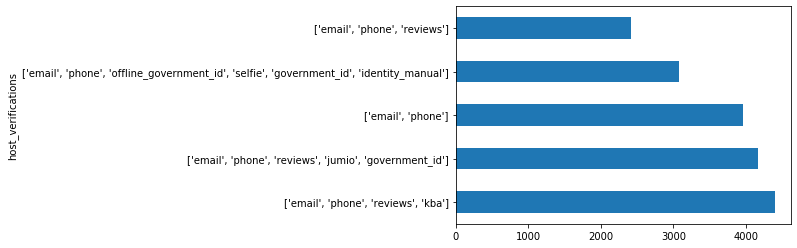

In [12]:
#host_verifications

df = listings.groupby('host_verifications')['host_verifications'].size().sort_values(ascending=False).head(5)
print(df.head())
df.plot.barh()

# we have host verified column, this is redundant

In [13]:
#convert values of host_verifications to list
host_verifications = listings['host_verifications'].values.tolist()

#host verivication split and add to list
host_verification_all = []

for row in host_verifications:
    row_clean = row.replace('[','').replace(']','')
    methods = row_clean.split(',')
    for method in methods:
        method_clean = method.replace("'","").strip()
        host_verification_all.append(method_clean)

Counter(host_verification_all).most_common(10)

[('phone', 50628),
 ('email', 47312),
 ('reviews', 34126),
 ('government_id', 32313),
 ('offline_government_id', 22301),
 ('jumio', 21672),
 ('selfie', 14902),
 ('identity_manual', 13299),
 ('kba', 11292),
 ('facebook', 10524)]

host_identity_verified
f    28296
t    22495
Name: host_verifications, dtype: int64


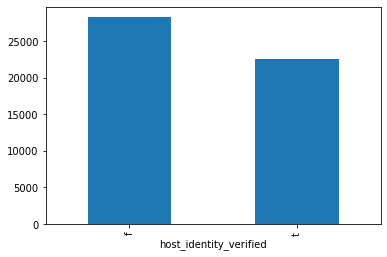

In [14]:
#host_identity_verified
df = listings.groupby('host_identity_verified')['host_verifications'].size()
print(df.head())
df.plot(kind='bar')

neighbourhood_group_cleansed
Bronx            1249 
Brooklyn         20455
Manhattan        22448
Queens           6266 
Staten Island    378  
Name: neighbourhood_group_cleansed, dtype: int64


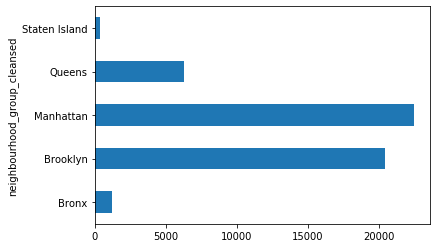

In [15]:
#neighbourhood_group_cleansed
df = listings.groupby('neighbourhood_group_cleansed')['neighbourhood_group_cleansed'].size()
print(df.head())
df.plot.barh()

In [16]:
# possible removal: 'latitude', 'longitude'

is_location_exact
f    8813 
t    41983
Name: is_location_exact, dtype: int64


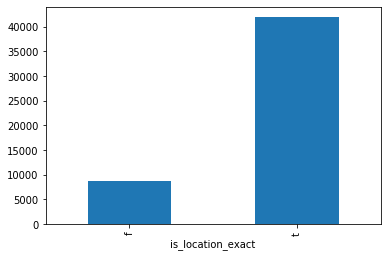

In [17]:
# is_location_exact
df = listings.groupby('is_location_exact')['is_location_exact'].size()
print(df.head())
df.plot(kind='bar')

property_type
Aparthotel           17   
Apartment            39637
Barn                 2    
Bed and breakfast    51   
Boat                 8    
Name: property_type, dtype: int64


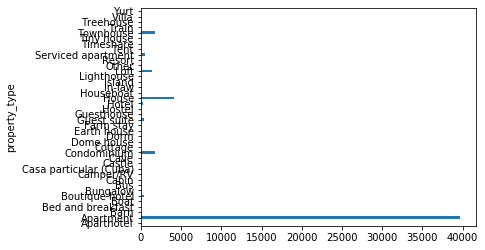

In [18]:
#property_type
df = listings.groupby('property_type')['property_type'].size()
print(df.head())
df.plot.barh()
#looks like mostly apartment, maybe we shouldn't use it, or split to apt vs non apt

room_type
Entire home/apt    26274
Hotel room         402  
Private room       22895
Shared room        1225 
Name: room_type, dtype: int64


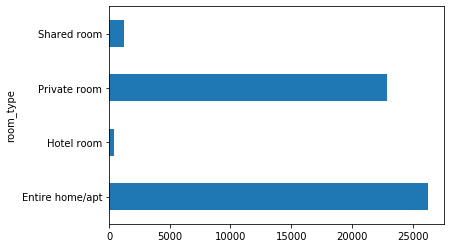

In [19]:
# room_type
df = listings.groupby('room_type')['room_type'].size()
print(df.head())
df.plot.barh()

accommodates
1    7655 
2    23351
3    5504 
4    7754 
5    2050 
Name: accommodates, dtype: int64


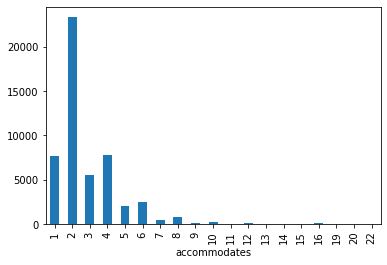

In [20]:
#accommodates
df = listings.groupby('accommodates')['accommodates'].size()
print(df.head())
df.plot(kind='bar')

0.0
15.5


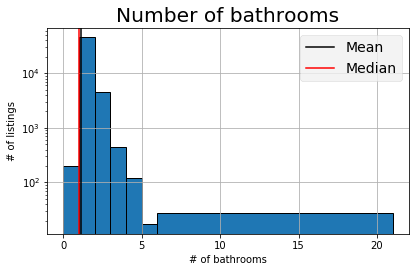

In [21]:
#bathrooms

column = 'bathrooms'

print(listings['bathrooms'].min())
print(listings['bathrooms'].max())

#data is from listings df
number_of_x = listings['bathrooms']
mean = listings['bathrooms'].mean()
median = listings['bathrooms'].median()

bins =  [0,1,2,3,4,5,6, 21]
plt.hist(number_of_x, bins=bins, edgecolor='black', log=True)
plt.axvline(mean, color='black', label='Mean')
plt.axvline(median, color='red', label='Median')

plt.style.use('fivethirtyeight')
plt.title('Number of {}'.format(column))
plt.xlabel('# of {}'.format(column))
plt.ylabel('# of listings')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

0.0
21.0


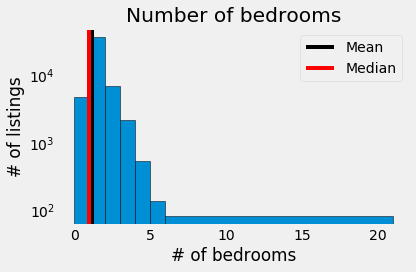

In [22]:
#bedrooms

column = 'bedrooms'

print(listings['bedrooms'].min())
print(listings['bedrooms'].max())

#data is from listings df
number_of_x = listings['bedrooms']
mean = listings['bedrooms'].mean()
median = listings['bedrooms'].median()

bins =  [0,1,2,3,4,5,6, 21]
plt.hist(number_of_x, bins=bins, edgecolor='black', log=True)
plt.axvline(mean, color='black', label='Mean')
plt.axvline(median, color='red', label='Median')

plt.style.use('fivethirtyeight')
plt.title('Number of {}'.format(column))
plt.xlabel('# of {}'.format(column))
plt.ylabel('# of listings')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

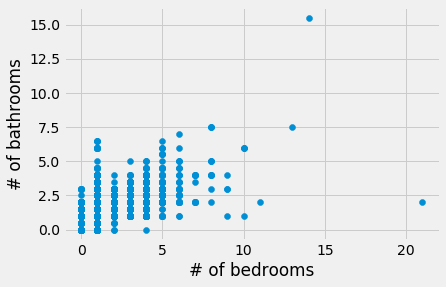

In [23]:
#bed bath and beyond
bed = listings['bedrooms']
bath = listings['bathrooms']

#chart
plt.scatter(bed, bath)
plt.xlabel('# of bedrooms')
plt.ylabel('# of bathrooms')
plt.show()

#this doesn't look like a correlation to me?

beds
0.0    1689 
1.0    31361
2.0    10724
3.0    3763 
4.0    1641 
Name: beds, dtype: int64


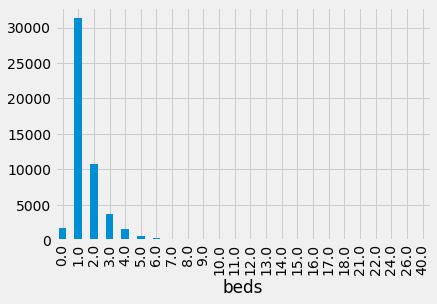

In [24]:
#beds
df = listings.groupby('beds')['beds'].size()
print(df.head())
df.plot(kind='bar')
#majority has 1 or 2.

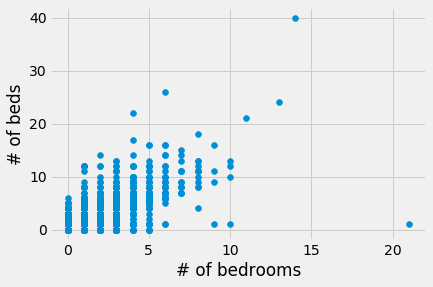

In [25]:
#beds and bedrooms relationship
room = listings['bedrooms']
bed = listings['beds']

#chart
plt.scatter(room, bed)
plt.xlabel('# of bedrooms')
plt.ylabel('# of beds')
plt.show()

#strange but no relationship, I think


bed_type
Airbed           153  
Couch            65   
Futon            271  
Pull-out Sofa    224  
Real Bed         50083
Name: bed_type, dtype: int64


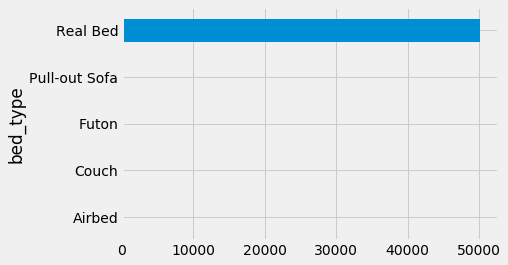

In [26]:
# bed_type
df = listings.groupby('bed_type')['bed_type'].size()
print(df.head())
df.plot.barh()
#Majority is real bed, split to real bed vs no

In [27]:
#amenities
#convert values of amenities to list
amenities = listings['amenities'].values.tolist()

#amenities split and add to list
amenities_all = []

for row in amenities:
    row_string = str(row)
    row_string_clean = row_string.replace('{','').replace('}','')
    amenities_rows = row_string_clean.split(',')
    for row in amenities_rows:
        row_clean = row.replace('"','')
        amenities_all.append(row_clean)

Counter(amenities_all).most_common(5)
#Make another column that counts how many amenities per listing

[('Wifi', 49527),
 ('Heating', 47857),
 ('Essentials', 46994),
 ('Kitchen', 46237),
 ('Smoke detector', 44426)]

guests_included
1    36595
2    9207 
3    1270 
4    2402 
5    414  
Name: guests_included, dtype: int64


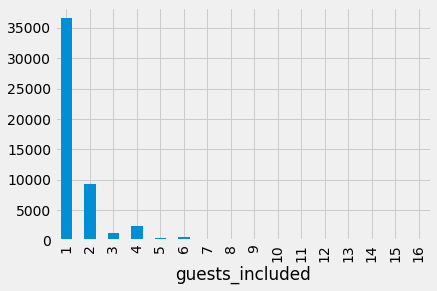

In [28]:
# guests_included
df = listings.groupby('guests_included')['guests_included'].size()
print(df.head())
df.plot(kind='bar')
#majority 1, maybe split into 2 classes?

instant_bookable
f    31622
t    19174
Name: instant_bookable, dtype: int64


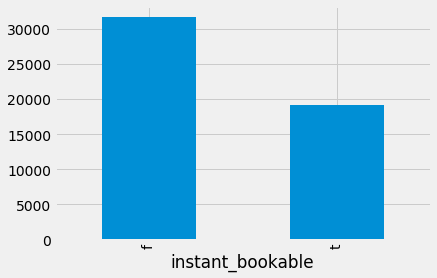

In [29]:
# instant_bookable
df = listings.groupby('instant_bookable')['instant_bookable'].size()
print(df.head())
df.plot(kind='bar')


cancellation_policy
flexible                       15461
moderate                       11871
strict                         62   
strict_14_with_grace_period    23285
super_strict_30                25   
Name: cancellation_policy, dtype: int64


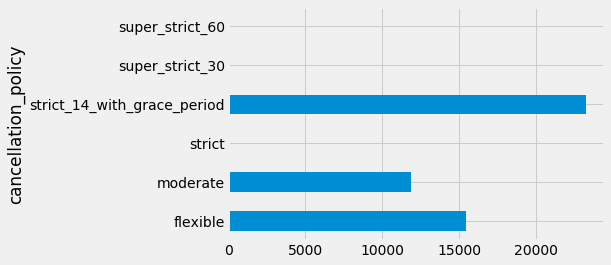

In [30]:
#cancellation_policy
df = listings.groupby('cancellation_policy')['cancellation_policy'].size()
print(df.head())
df.plot.barh()

#let's do 3 classes (flexible, moderate, and strict)

In [31]:
#Currency related
#fill with $0.00
Fill_with_zero = ['security_deposit', 'cleaning_fee']

for column in Fill_with_zero:
    listings[column] = listings[column].replace(np.nan, '$0.00')

In [32]:
#all dollars fields
#function
def fix_currency(row):
    row = row.replace(',', '')
    row = row.replace('$', '')
    return row

In [33]:
colname = 'extra_people'
listings[colname] = listings[colname].apply(lambda col: fix_currency(col)).astype(float)

colname = 'cleaning_fee'
listings[colname] = listings[colname].apply(lambda col: fix_currency(col)).astype(float)

colname = 'security_deposit'
listings[colname] = listings[colname].apply(lambda col: fix_currency(col)).astype(float)

colname = 'price'
listings[colname] = listings[colname].apply(lambda col: fix_currency(col)).astype(float)


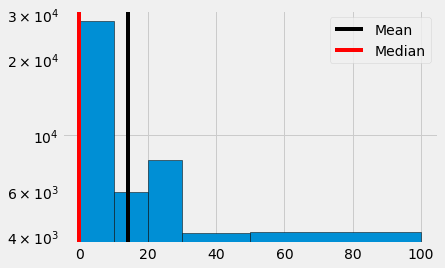

In [34]:
#extra_people
df = listings['extra_people']
bins =  [0,10,20,30,50,100]
mean = df.mean()
median = df.median()

plt.hist(df, bins=bins, edgecolor='black', log=True)
plt.axvline(mean, color='black', label='Mean')
plt.axvline(median, color='red', label='Median')

plt.legend()
plt.show()
#seems ok the way it is

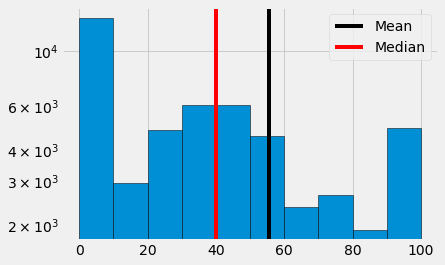

In [35]:
#cleaning_fee
df = listings['cleaning_fee']
bins =  [0,10,20,30,50,60,70,80,90,100]
mean = df.mean()
median = df.median()

plt.hist(df, bins=bins, edgecolor='black', log=True)
plt.axvline(mean, color='black', label='Mean')
plt.axvline(median, color='red', label='Median')

plt.legend()
plt.show()


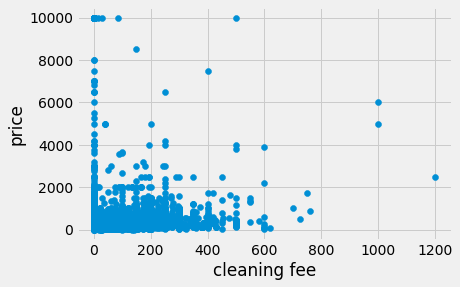

In [36]:
#cleaning service and price
clean_fee = listings['cleaning_fee']
price = listings['price']

#chart
plt.scatter(clean_fee, price)
plt.xlabel('cleaning fee')
plt.ylabel('price')
plt.show()

In [37]:
#turn cleaning fee to yes and no column
def cleaning_fee_yes_no (row):
    if row['cleaning_fee'] > 0.00:
        return '1'
    else:
        return '0'

In [38]:
listings['cleaning_fee_yes_no'] = listings.apply(cleaning_fee_yes_no, axis=1)

In [39]:
listings.groupby('cleaning_fee_yes_no').agg({'price':'mean'})


,price
cleaning_fee_yes_no,
0,202.574334
1,153.643631


In [40]:
#turn security deposit to yes and no column
def security_deposit_yes_no (row):
    if row['security_deposit'] > 0.00:
        return '1'
    else:
        return '0'

In [41]:
listings['security_deposit_yes_no'] = listings.apply(security_deposit_yes_no, axis=1)

In [42]:
listings.groupby('security_deposit_yes_no').agg({'price':'mean'})

,price
security_deposit_yes_no,
0,162.646346
1,171.818497


In [43]:
def extra_people_yes_no (row):
    if row['extra_people'] > 0.00:
        return '1'
    else:
        return '0'

In [44]:
listings['extra_people_yes_no'] = listings.apply(extra_people_yes_no, axis=1)

In [45]:
listings.groupby('extra_people_yes_no').agg({'price':'mean'})

,price
extra_people_yes_no,
0,183.485233
1,146.856568


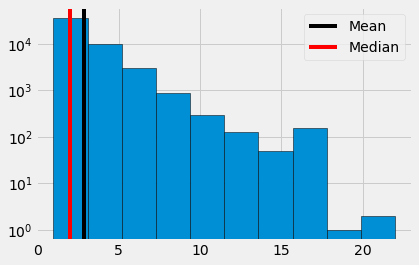

In [46]:
#accommodates
df = listings['accommodates']
bins = 10
mean = df.mean()
median = df.median()

plt.hist(df, bins=bins, edgecolor='black', log=True)
plt.axvline(mean, color='black', label='Mean')
plt.axvline(median, color='red', label='Median')

plt.legend()
plt.show()

In [47]:
#accomodates
listings.groupby('accommodates').agg({'cleaning_fee':'mean', 'security_deposit':'mean', 'price':'mean'}).sort_values(by='accommodates',ascending=False)

,cleaning_fee,security_deposit,price
accommodates,,,
22,270.000000,1000.000000,1569.000000
20,270.000000,999.000000,1479.000000
19,240.000000,1000.000000,1369.000000
16,187.160256,401.089744,958.743590
15,182.823529,464.705882,553.117647
14,170.625000,367.812500,472.625000
13,187.450000,684.750000,703.750000
12,183.824074,473.703704,488.481481
11,150.456522,458.586957,347.565217


In [48]:
#looks like i have to remove any records that acoomodates more than 10 or so
listings.groupby('accommodates')['accommodates'].count().sort_values(ascending=False)

accommodates
2     23351
4     7754 
1     7655 
3     5504 
6     2502 
5     2050 
8     752  
7     485  
10    254  
16    156  
12    108  
9     107  
11    46   
14    32   
13    20   
15    17   
20    1    
19    1    
22    1    
Name: accommodates, dtype: int64

In [49]:
#new listings for all records with less than 20 accomodates
filt = listings['accommodates'] < 20
listings = listings[filt]
listings.shape

(50794, 42)

# Target Variable: Price

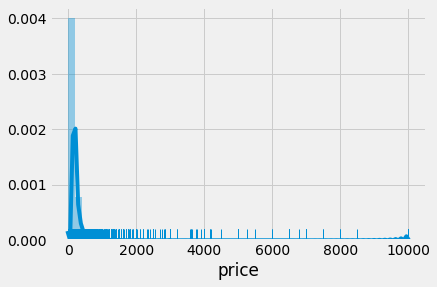

In [50]:
#see all price in graph
sns.distplot(listings['price'], rug=True)

In [51]:
#looking at property type of high price
filt = listings['price'] > 1000
print('Record count is {}'.format(listings[filt].groupby('property_type')['property_type'].count().sum()))
print(listings[filt].groupby('property_type')['property_type'].count())

#looks like removing 'Boutique hotel' will take care of most of high price

Record count is 350
property_type
Aparthotel            1  
Apartment             139
Boutique hotel        71 
Bungalow              1  
Condominium           18 
Guest suite           2  
Hotel                 15 
House                 24 
Loft                  21 
Other                 6  
Resort                2  
Serviced apartment    10 
Townhouse             39 
Villa                 1  
Name: property_type, dtype: int64


In [52]:
filt = listings['room_type'] == 'Hotel room'
listings[filt].groupby(['property_type', 'room_type'])[['property_type', 'room_type']].count()

#we can remove room_type == hotel room and remove all hotel type

,,property_type,room_type
property_type,room_type,,
Aparthotel,Hotel room,10,10
Bed and breakfast,Hotel room,5,5
Boutique hotel,Hotel room,145,145
Hostel,Hotel room,7,7
Hotel,Hotel room,185,185
Resort,Hotel room,2,2
Serviced apartment,Hotel room,48,48


In [53]:
#dropping records with certain property type, mostly hotels and records with bad price (0 or more than 2000)
filt = (~listings['property_type'].isin (['Aparthotel','Bed and breakfast','Boutique hotel',' Hostel', 'Hotel', 'Resort', 'Serviced apartment'])) & (listings['price'] < 1000)

listings = listings[filt]

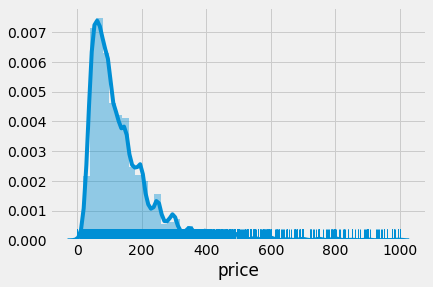

In [54]:
#see in the graph for all price
sns.distplot(listings['price'][filt], rug=True)

# Filter records with $0 price

In [55]:
filt = listings['price'] > 0
listings = listings[filt]

# Filter records no review in a year

In [56]:
#count how many records got reviews last 1 year
scraped_date = datetime.strptime('2020-03-14',"%Y-%m-%d")
listings['last_review_days_ago'] = (scraped_date - pd.to_datetime(listings['last_review'])).dt.days
filt = listings['last_review_days_ago'] <= 365
listings['property_type'][filt].count()

28364

In [57]:
#create new df for only records that have reviews in last 200 days
listings = listings[filt]

#see sample
listings['last_review_days_ago'].head()

id
2595    131.0
3831    20.0 
5099    153.0
5121    103.0
5178    15.0 
Name: last_review_days_ago, dtype: float64

# Export to CSV
Filename is selected_rows_listings.csv. To be used by next program

In [58]:
#export columns left to csv to be used with second notebook
path = '../../../data/new-york-city-airbnb-open-data/'

listings_csv = os.path.join(path,'selected_rows_listings.csv')
listings.to_csv(listings_csv)